In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import glob

In [2]:
drive.mount("/content/drive")
baseUrl = '/content/drive/Shared drives/Analitica Predictiva'
os.chdir(baseUrl)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
names = ['Colombia','Bogota','Medellin','Cali','Barranquilla','Cartagena']

In [4]:
dfs={}
for name in names:
  dfs[name] = pd.read_pickle('Datos/data_{}.pickle'.format(name))

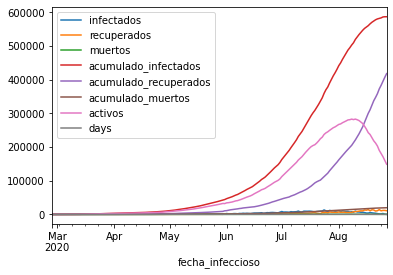

In [5]:
#Test Df
dfs['Colombia'].plot()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

df_proc = dfs['Colombia'].copy()


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso


def TrainPlot(tipo,label,df_proc):
  X = df_proc['days'].values[0:]
  X = X.reshape(len(X),1)
  Y = df_proc[tipo].values[0:]
  Y = Y.reshape(len(Y),1)

  x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, shuffle = False)

  pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso())
  lin_reg = pipe
  lin_reg.fit(x_train,y_train)
  x_plot = np.arange(0,200)
  x_plot = X
  y_plot = lin_reg.predict(X)
  plt.figure(figsize=(10,5))
  plt.plot(x_plot,y_plot,label='predict')
  plt.plot(x_test,y_test,label='train')
  plt.plot(x_train,y_train,label='test')
  plt.legend()
  plt.title("{}-{}".format(label,tipo) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

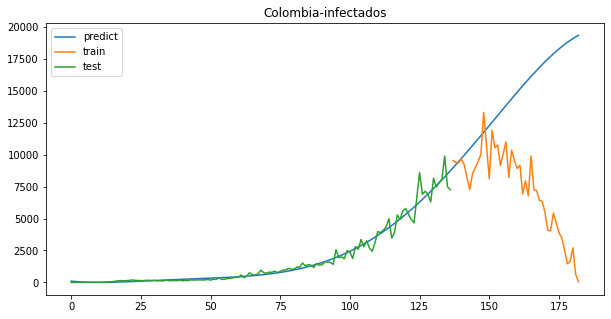

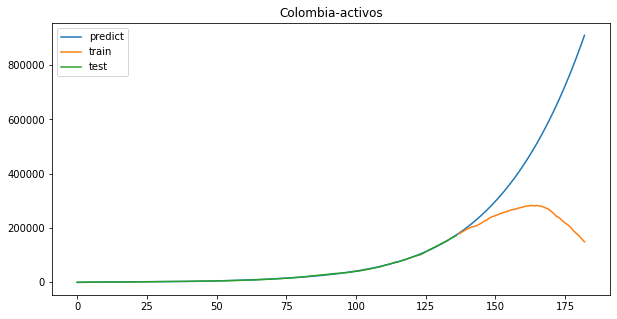

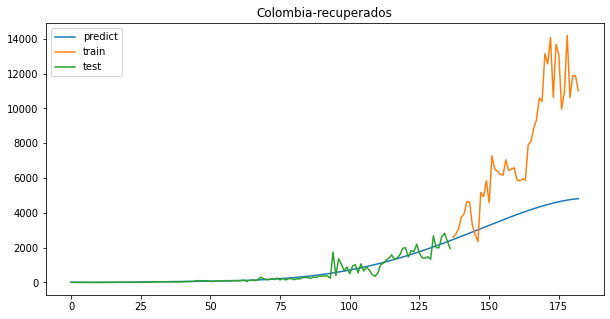

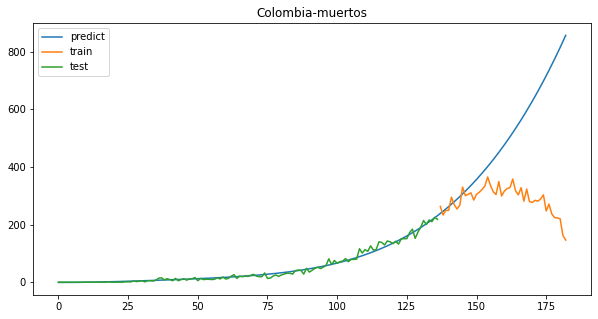

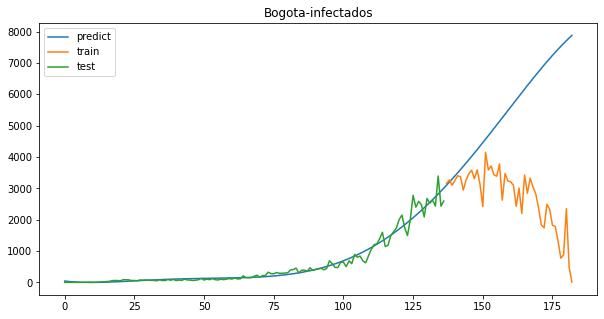

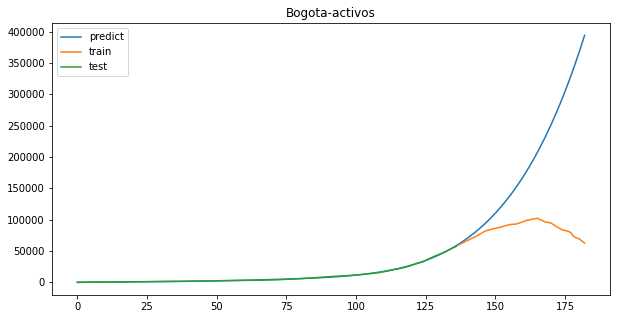

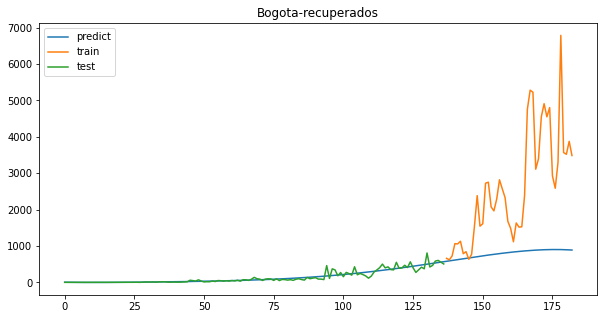

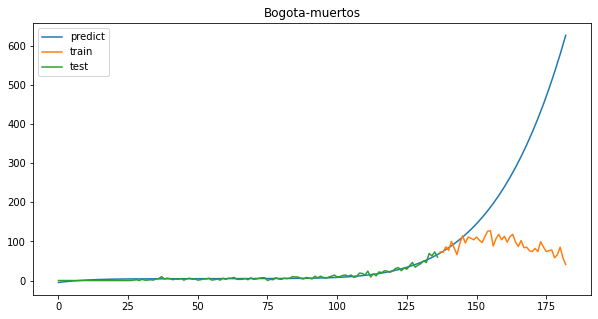

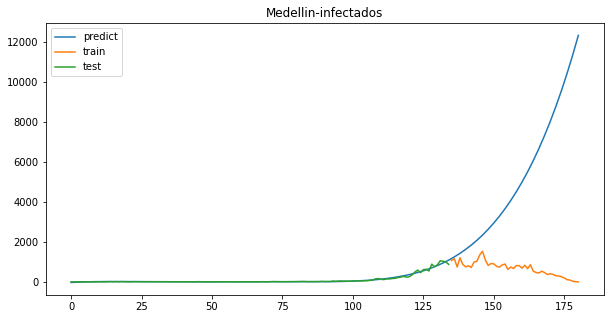

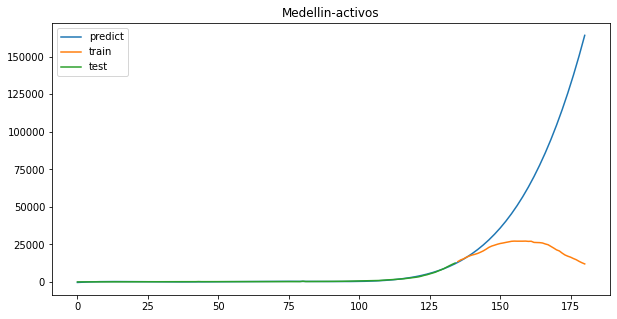

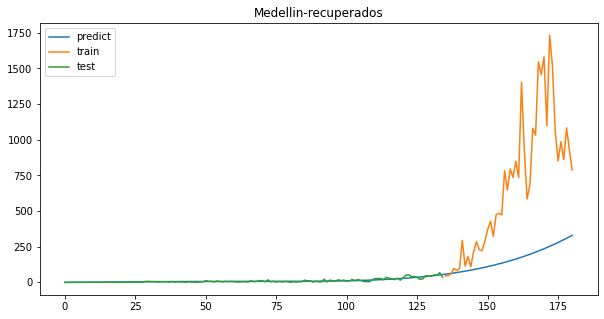

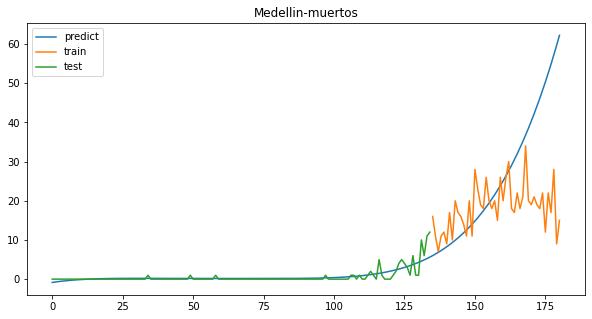

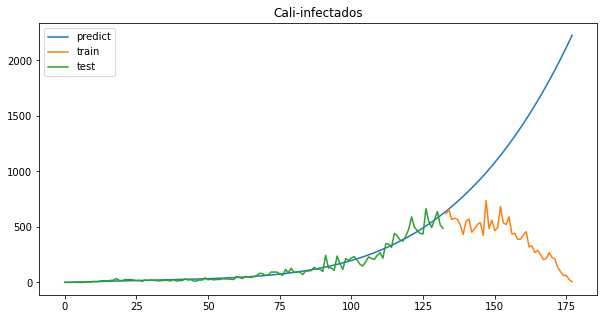

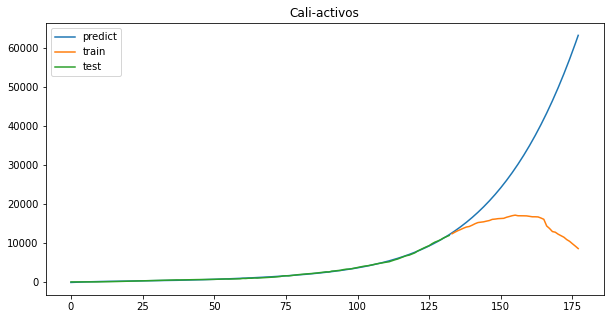

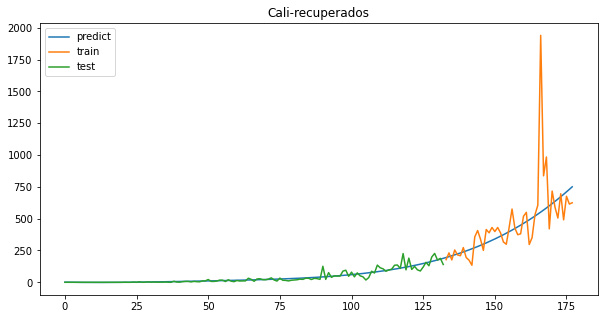

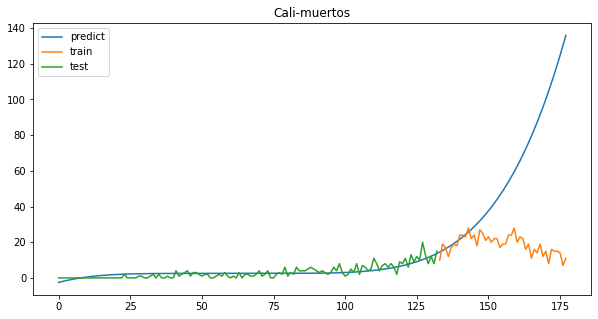

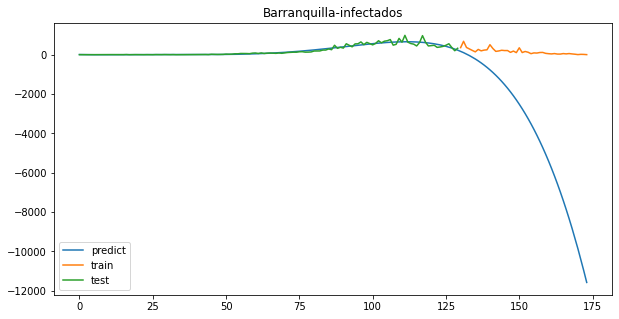

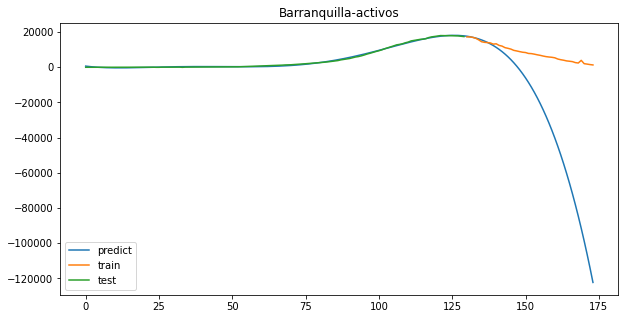

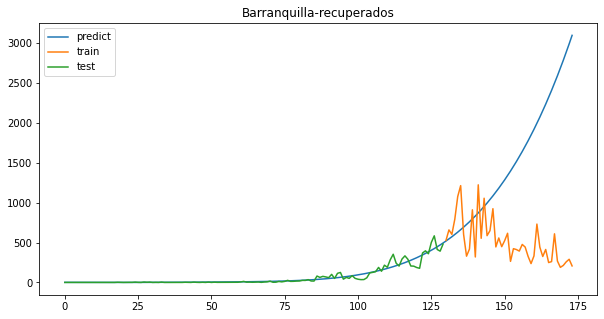

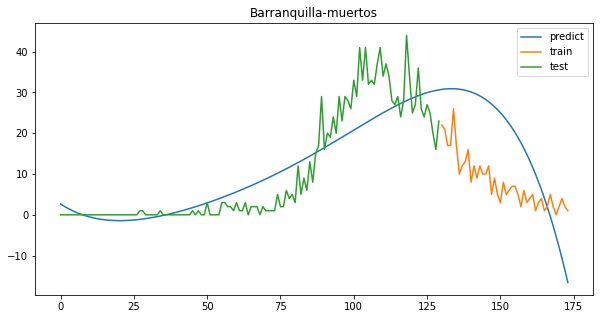

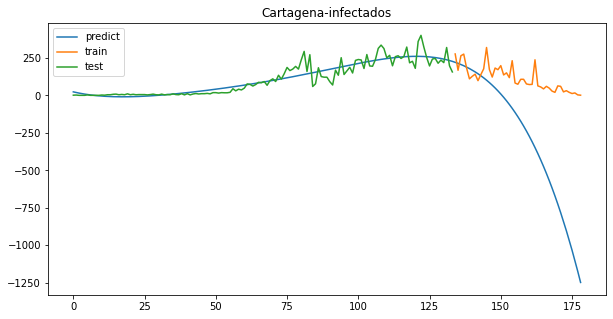

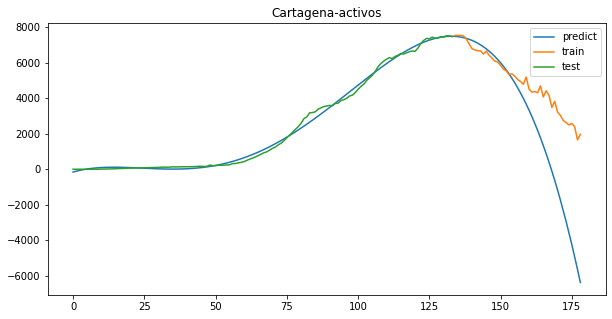

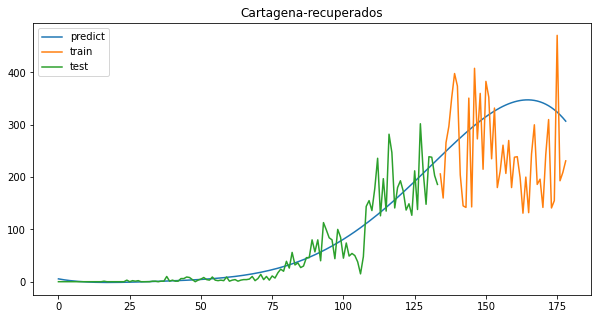

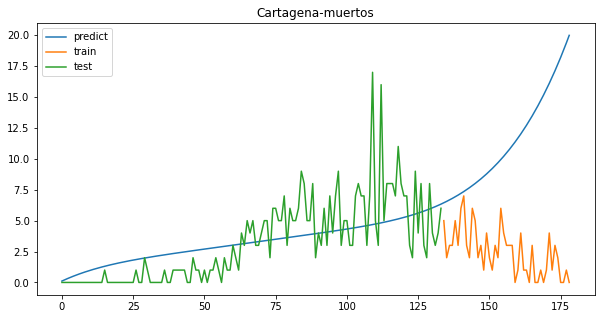

In [12]:
for name in names:
  TrainPlot('infectados',name,dfs[name])
  TrainPlot('activos',name,dfs[name])
  TrainPlot('recuperados',name,dfs[name])
  TrainPlot('muertos',name,dfs[name])

In [13]:
def TrainPlotPipe(tipo,label,df_proc,pipe):
  X = df_proc['days'].values[0:]
  X = X.reshape(len(X),1)
  Y = df_proc[tipo].values[0:]
  Y = Y.reshape(len(Y),1)

  x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, shuffle = False)
  lin_reg = pipe
  lin_reg.fit(x_train,y_train)
  x_plot = np.arange(0,200)
  x_plot = X
  y_plot = lin_reg.predict(X)
  plt.figure(figsize=(10,5))
  plt.plot(x_plot,y_plot,label='predict')
  plt.plot(x_test,y_test,label='train')
  plt.plot(x_train,y_train,label='test')
  plt.legend()
  plt.title("{}-{}".format(label,tipo) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

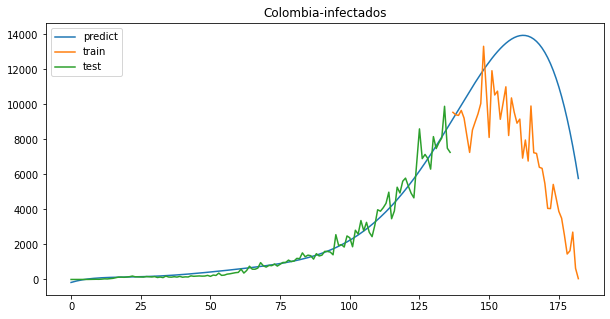

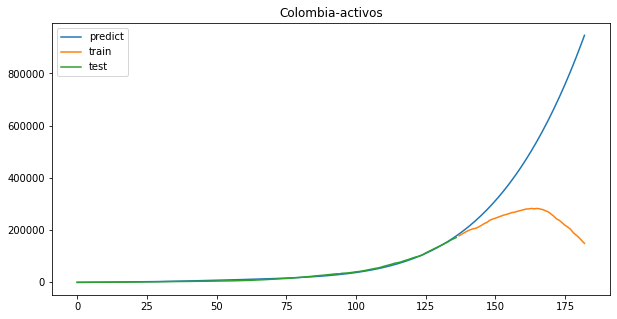

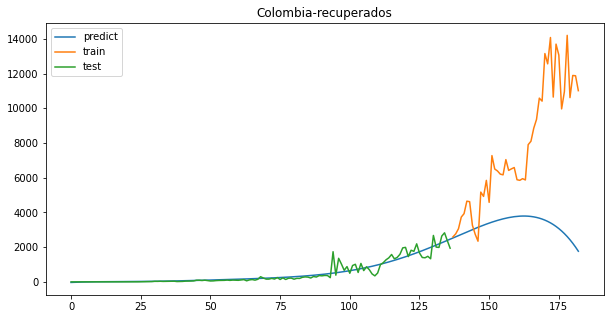

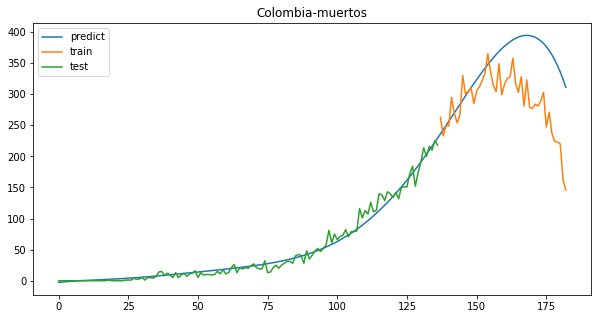

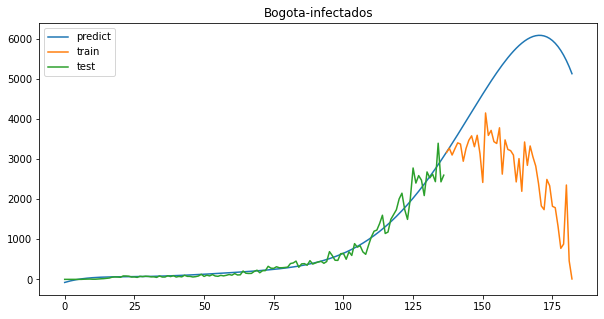

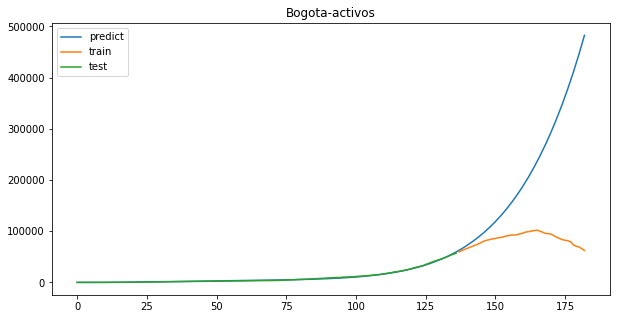

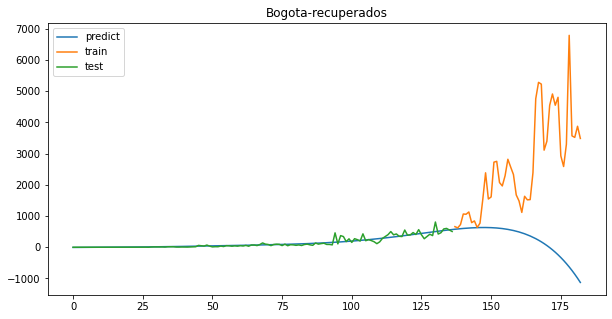

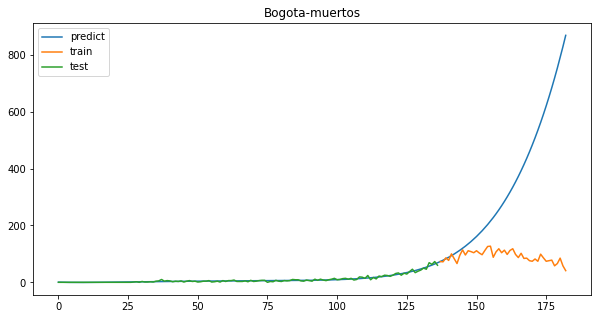

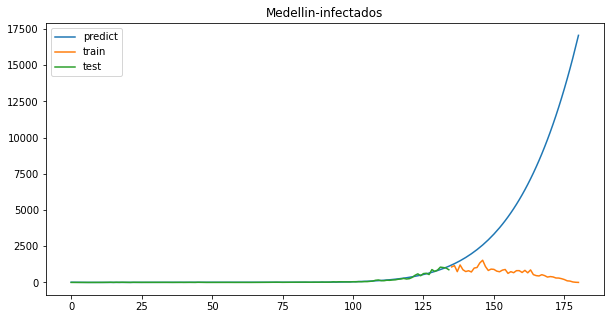

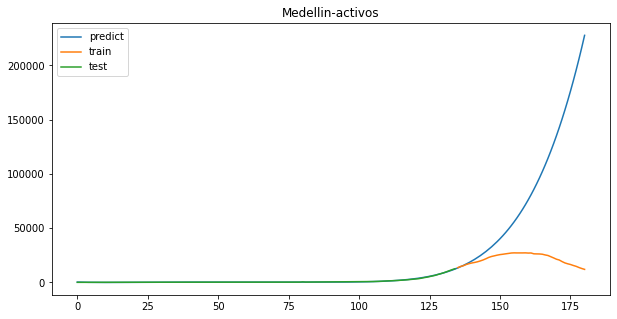

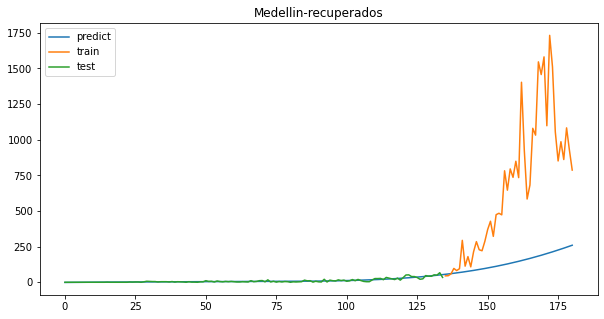

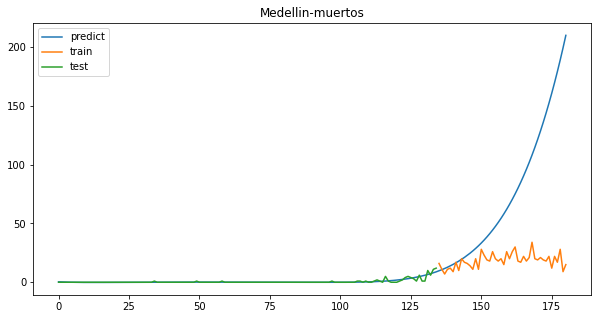

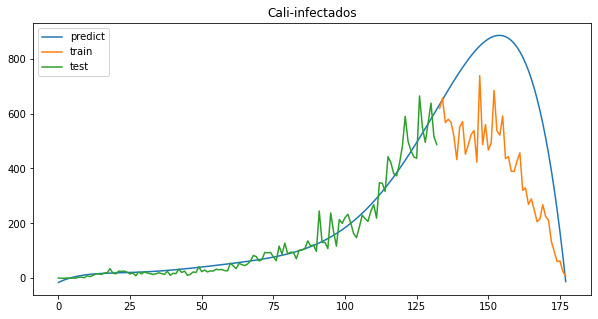

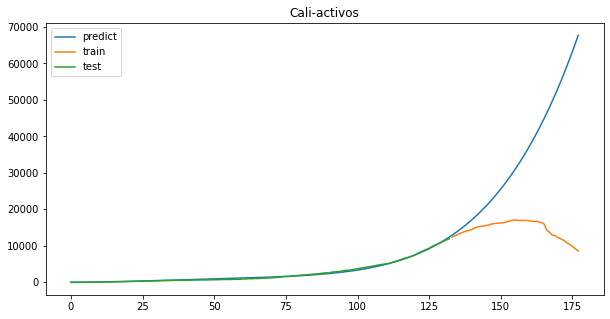

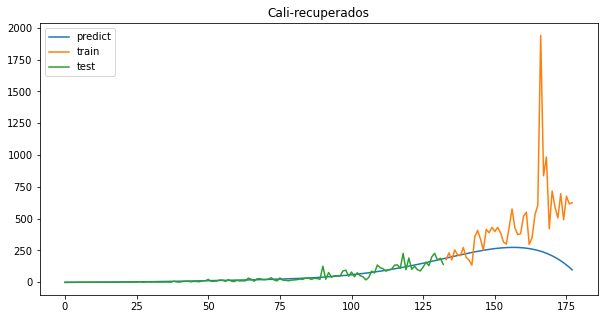

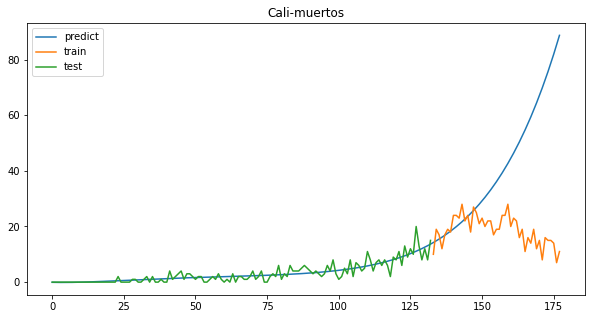

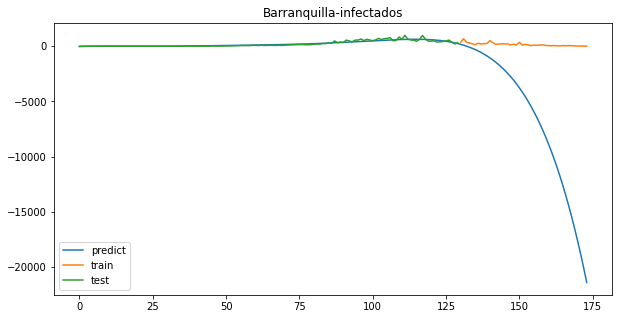

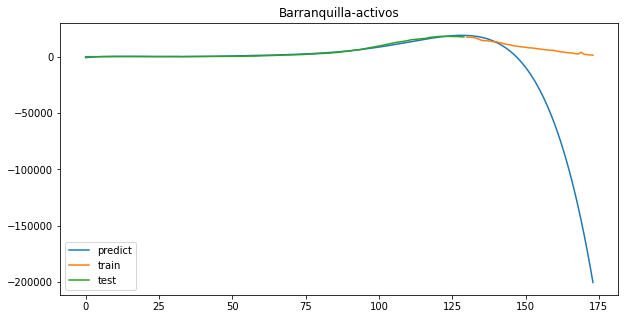

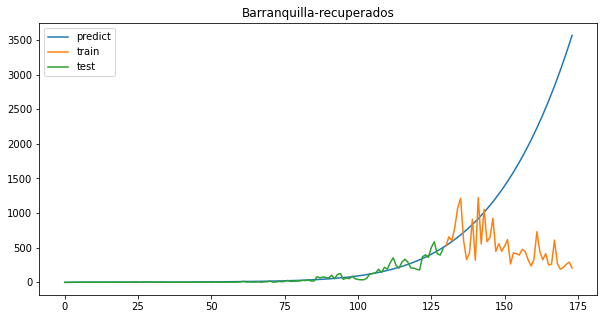

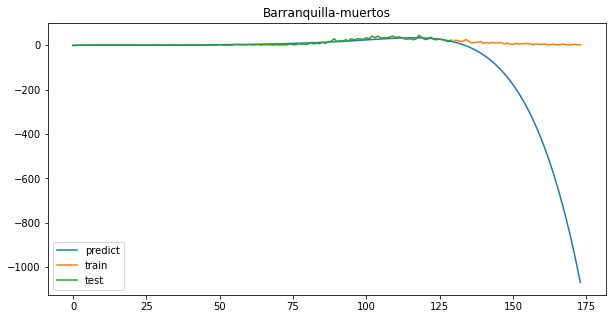

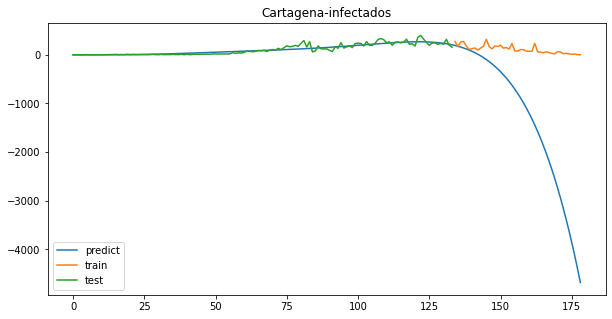

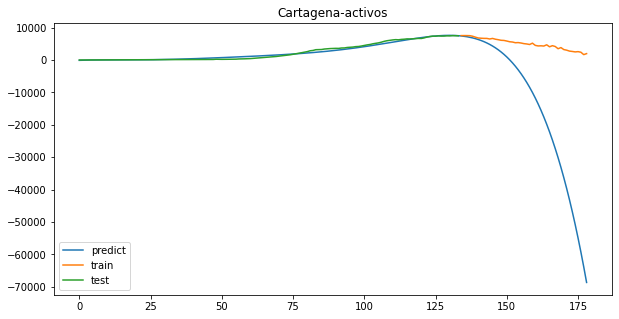

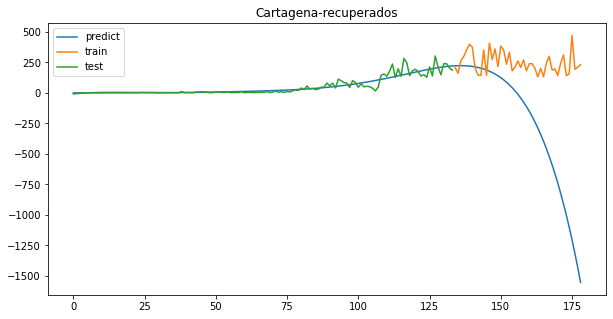

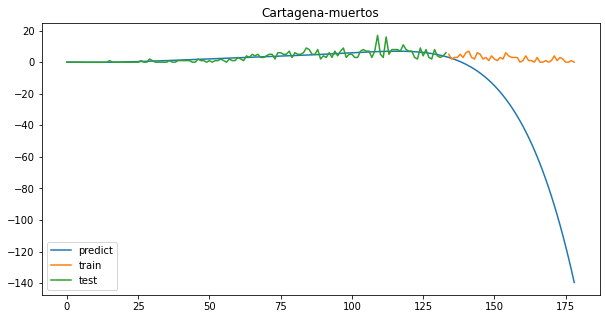

In [15]:
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=6),Ridge(alpha=10))

for name in names:
  TrainPlotPipe('infectados',name,dfs[name],pipe)
  TrainPlotPipe('activos',name,dfs[name],pipe)
  TrainPlotPipe('recuperados',name,dfs[name],pipe)
  TrainPlotPipe('muertos',name,dfs[name],pipe)